In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('weather_hourly_chicago.csv')

In [55]:
#die Daten sortieren, denn sie sind falsch sortiert!
df=df.sort_values('date_time')

df

,date_time,max_temp,min_temp,precip
6,2015-01-01 07:00:00,-8.3,-8.3,0.0
7,2015-01-01 08:00:00,-8.9,-8.9,0.0
8,2015-01-01 09:00:00,-8.9,-8.9,0.0
9,2015-01-01 10:00:00,-9.4,-9.4,0.0
10,2015-01-01 11:00:00,-10.0,-10.0,0.0
...,...,...,...,...
38934,NaN,NaN,NaN,NaN
38935,NaN,NaN,NaN,NaN
38936,NaN,NaN,NaN,NaN
38937,NaN,NaN,NaN,NaN


In [56]:
#die daten von 2017 fangen erst hier an
df.iloc[17514:]

,date_time,max_temp,min_temp,precip
17541,2016-12-31 22:00:00,0.6,0.6,0.0
17542,2016-12-31 23:00:00,0.0,0.0,0.0
17543,2017-01-01 00:00:00,-0.6,-0.6,0.0
17520,2017-01-01 01:00:00,-2.2,-2.2,0.0
17521,2017-01-01 02:00:00,-2.8,-2.8,0.0
...,...,...,...,...
38934,NaN,NaN,NaN,NaN
38935,NaN,NaN,NaN,NaN
38936,NaN,NaN,NaN,NaN
38937,NaN,NaN,NaN,NaN


In [57]:
#alle daten vor 2017 rauswerfen
df = df.iloc[17516:]

In [58]:
df.iloc[:8753]

,date_time,max_temp,min_temp,precip
17543,2017-01-01 00:00:00,-0.6,-0.6,0.0
17520,2017-01-01 01:00:00,-2.2,-2.2,0.0
17521,2017-01-01 02:00:00,-2.8,-2.8,0.0
17522,2017-01-01 03:00:00,-3.3,-3.3,0.0
17523,2017-01-01 04:00:00,-3.3,-3.3,0.0
...,...,...,...,...
26300,2017-12-31 21:00:00,-10.6,-10.6,0.0
26301,2017-12-31 22:00:00,-11.7,-11.7,0.0
26302,2017-12-31 23:00:00,-12.8,-12.8,0.0
26303,2018-01-01 00:00:00,-13.9,-13.9,0.0


In [59]:
#alle daten nach 2017 wegscheiden
df=df.iloc[:8751]
df

,date_time,max_temp,min_temp,precip
17543,2017-01-01 00:00:00,-0.6,-0.6,0.0
17520,2017-01-01 01:00:00,-2.2,-2.2,0.0
17521,2017-01-01 02:00:00,-2.8,-2.8,0.0
17522,2017-01-01 03:00:00,-3.3,-3.3,0.0
17523,2017-01-01 04:00:00,-3.3,-3.3,0.0
...,...,...,...,...
26298,2017-12-31 19:00:00,-11.1,-11.1,0.0
26299,2017-12-31 20:00:00,-10.6,-10.6,0.0
26300,2017-12-31 21:00:00,-10.6,-10.6,0.0
26301,2017-12-31 22:00:00,-11.7,-11.7,0.0


In [60]:
#Datensatz bisschen aufraumen

#avg temperatur berechne und hinzufuegen
df['avg_temp']=df[['max_temp','min_temp']].mean(axis=1)
#max und min temperatur wegschmeißem
df=df.drop(["max_temp", "min_temp"], axis = 1)
#dublikate löschen
df=df.drop_duplicates(subset=['date_time'])
#index wieder etwas schön machen
df.reset_index(drop=True, inplace=True)
df

,date_time,precip,avg_temp
0,2017-01-01 00:00:00,0.0,-0.6
1,2017-01-01 01:00:00,0.0,-2.2
2,2017-01-01 02:00:00,0.0,-2.8
3,2017-01-01 03:00:00,0.0,-3.3
4,2017-01-01 04:00:00,0.0,-3.3
...,...,...,...
8232,2017-12-31 19:00:00,0.0,-11.1
8233,2017-12-31 20:00:00,0.0,-10.6
8234,2017-12-31 21:00:00,0.0,-10.6
8235,2017-12-31 22:00:00,0.0,-11.7


In [61]:
#gibt dir anzahl der tage des monats
def tagepromonth(month):
    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        return 31
    if month==4 or month==6 or month==9 or month==11:
        return 30
    if month==2:
        return 28

#der dates datensatz soll alle richtigen timestamps beinhalten, wobei es im moment nur strings sind
dates=[]

for monat in range(12):
    for tag in range(tagepromonth(monat+1)):
        for stunde in range(24):
            if monat<9:
                mon='0'+str(monat+1)
            else:
                mon=str(monat+1)
            if tag<9:
                day='0'+str(tag+1)
            else:
                day=str(tag+1)
            if stunde<=9:
                hour='0'+str(stunde)
            else:
                hour=str(stunde)
                
            date="2017-"+mon+"-"+day+" "+hour+':00:00'
            dates.append(date)

In [62]:
#dataframe erstellen, mit allen timestamps vorhanden (365*24=8760)
alldatesdf=pd.DataFrame(dates,columns=['date_time'])

In [63]:
#zu falldates die vorhandenen  wetterdaten hinzufuergen
falldates=alldatesdf.merge(df,how='left',left_on=['date_time'],right_on=['date_time'])
falldates


,date_time,precip,avg_temp
0,2017-01-01 00:00:00,0.0,-0.6
1,2017-01-01 01:00:00,0.0,-2.2
2,2017-01-01 02:00:00,0.0,-2.8
3,2017-01-01 03:00:00,0.0,-3.3
4,2017-01-01 04:00:00,0.0,-3.3
...,...,...,...
8755,2017-12-31 19:00:00,0.0,-11.1
8756,2017-12-31 20:00:00,0.0,-10.6
8757,2017-12-31 21:00:00,0.0,-10.6
8758,2017-12-31 22:00:00,0.0,-11.7


In [64]:
#gucken an wie vielen stellen der precip wert fehlt
missing=falldates[falldates['precip'].isna()]
missing

,date_time,precip,avg_temp
41,2017-01-02 17:00:00,NaN,NaN
44,2017-01-02 20:00:00,NaN,NaN
47,2017-01-02 23:00:00,NaN,NaN
55,2017-01-03 07:00:00,NaN,NaN
59,2017-01-03 11:00:00,NaN,NaN
...,...,...,...
8694,2017-12-29 06:00:00,NaN,NaN
8708,2017-12-29 20:00:00,NaN,NaN
8711,2017-12-29 23:00:00,NaN,NaN
8713,2017-12-30 01:00:00,NaN,NaN


In [65]:
# forward fill für precip
falldates["precip"] = falldates["precip"].fillna(method = "ffill") 

In [66]:
#gucken an wie vielen stellen der avg_temp wert fehlt
missing=falldates[falldates['avg_temp'].isna()]
missing

,date_time,precip,avg_temp
41,2017-01-02 17:00:00,0.0,NaN
44,2017-01-02 20:00:00,0.0,NaN
47,2017-01-02 23:00:00,0.0,NaN
55,2017-01-03 07:00:00,1.0,NaN
59,2017-01-03 11:00:00,0.0,NaN
...,...,...,...
8694,2017-12-29 06:00:00,1.0,NaN
8708,2017-12-29 20:00:00,1.0,NaN
8711,2017-12-29 23:00:00,1.0,NaN
8713,2017-12-30 01:00:00,1.0,NaN


In [67]:
#die fehlenden werte durch interpolation fuellen
final_df = falldates.interpolate(method='index', limit=1)

In [68]:
#gucken an wie vielen stellen der avg_temp wert fehlt (leider immer noch 3)
missing=final_df[final_df['avg_temp'].isna()]
missing

,date_time,precip,avg_temp
4061,2017-06-19 05:00:00,0.0,NaN
5480,2017-08-17 08:00:00,0.0,NaN
5481,2017-08-17 09:00:00,0.0,NaN


In [69]:
#angucken warum hier immer noch die temperatur fehlt(weil mehrere temperatur werte hintereinander gefehlt
#haben und wir die interpolation erstmal auf 1 concecutive empty row beschraenkt haben)
falldates.iloc[4057:4065]

,date_time,precip,avg_temp
4057,2017-06-19 01:00:00,0.0,23.3
4058,2017-06-19 02:00:00,0.0,23.3
4059,2017-06-19 03:00:00,0.0,22.2
4060,2017-06-19 04:00:00,0.0,NaN
4061,2017-06-19 05:00:00,0.0,NaN
4062,2017-06-19 06:00:00,0.0,21.1
4063,2017-06-19 07:00:00,0.0,20.0
4064,2017-06-19 08:00:00,0.0,18.9


In [70]:
#das gleiche wie darueber
falldates.iloc[5477:5485]

,date_time,precip,avg_temp
5477,2017-08-17 05:00:00,0.0,NaN
5478,2017-08-17 06:00:00,0.0,25.0
5479,2017-08-17 07:00:00,0.0,NaN
5480,2017-08-17 08:00:00,0.0,NaN
5481,2017-08-17 09:00:00,0.0,NaN
5482,2017-08-17 10:00:00,1.0,23.9
5483,2017-08-17 11:00:00,1.0,NaN
5484,2017-08-17 12:00:00,1.0,23.3


In [71]:
#its safe to say that i can easily interpolate with more than 1 limit!(since it affect only two indivudual cases
#where die data before and after looks good enough.)
final_df = falldates.interpolate(method='index', limit=3)
final_df

,date_time,precip,avg_temp
0,2017-01-01 00:00:00,0.0,-0.6
1,2017-01-01 01:00:00,0.0,-2.2
2,2017-01-01 02:00:00,0.0,-2.8
3,2017-01-01 03:00:00,0.0,-3.3
4,2017-01-01 04:00:00,0.0,-3.3
...,...,...,...
8755,2017-12-31 19:00:00,0.0,-11.1
8756,2017-12-31 20:00:00,0.0,-10.6
8757,2017-12-31 21:00:00,0.0,-10.6
8758,2017-12-31 22:00:00,0.0,-11.7


In [72]:
#ueberpruefen ob wirklich jetzt alle eintraege da sind.
final_df.count()

date_time    8760
precip       8760
avg_temp     8760
dtype: int64

In [73]:
#abspeichern des fertigen wetter datensatzes!
final_df.to_csv('weather_clean_final.csv')

In [74]:
#timestamp formatieren und precip nach hinten verschieben
final_df['date_time']=pd.to_datetime(final_df['date_time'])
final_df=final_df[['date_time','avg_temp','precip']]
final_df

,date_time,avg_temp,precip
0,2017-01-01 00:00:00,-0.6,0.0
1,2017-01-01 01:00:00,-2.2,0.0
2,2017-01-01 02:00:00,-2.8,0.0
3,2017-01-01 03:00:00,-3.3,0.0
4,2017-01-01 04:00:00,-3.3,0.0
...,...,...,...
8755,2017-12-31 19:00:00,-11.1,0.0
8756,2017-12-31 20:00:00,-10.6,0.0
8757,2017-12-31 21:00:00,-10.6,0.0
8758,2017-12-31 22:00:00,-11.7,0.0


In [75]:
# hier die timestamps abbrunden um gleich zusammenzufuehren
#also den datensatz ein bissche erweitern
final_df.loc[:,'hour']=final_df['date_time'].apply(lambda h :h.hour)
final_df.loc[:,'day']=final_df['date_time'].apply(lambda d :d.day)
final_df.loc[:,'month']=final_df['date_time'].apply(lambda m :m.month)

/Users/SG/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/SG/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [79]:
#das ist nur um die folgenden plots zu erstellen:
final_df['date']=final_df['date_time'].apply(lambda d: pd.to_datetime(d).floor('d'))

<ipython-input-79-d8c2ffbf0c4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date']=final_df['date_time'].apply(lambda d: pd.to_datetime(d).floor('d'))


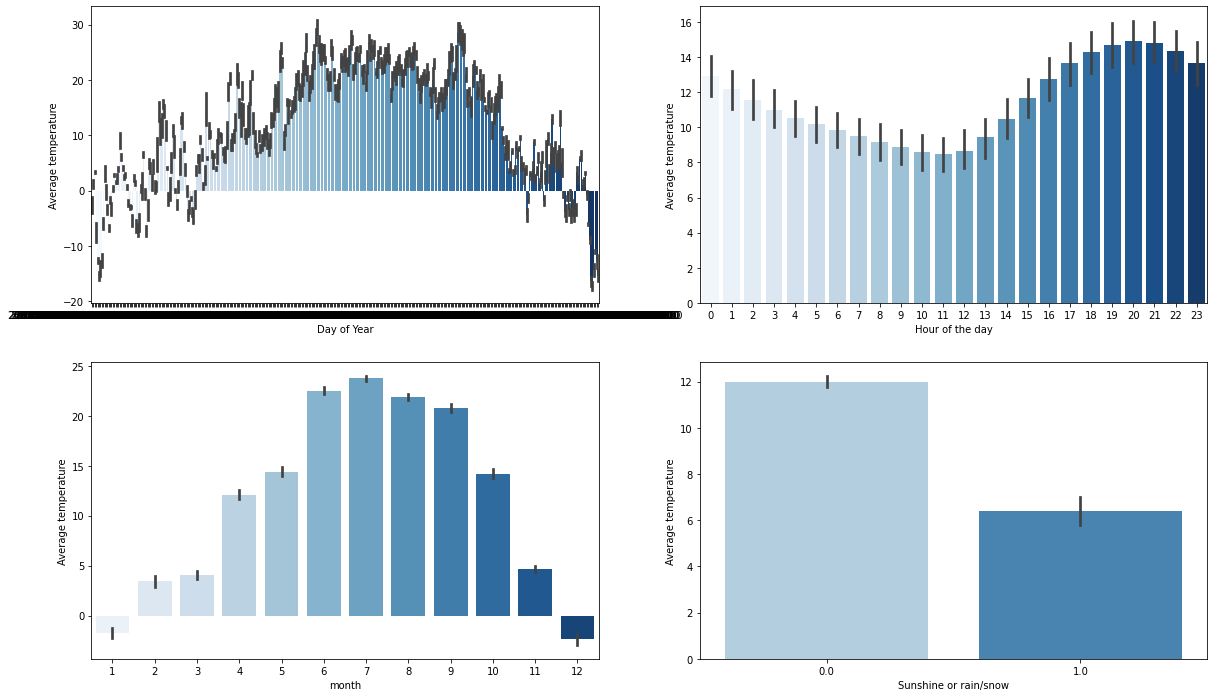

In [80]:
##hier nur mal die wetter daten genauer angeguckt und online verglichen, sieht alles top aus, also korrekt!

f, axes=plt.subplots(2,2, figsize=(20,12))

#color palettes: 'crest', 'Blues', 'YlOrBr'

days_plot=sns.barplot(x='date',y='avg_temp',data=final_df,ax=axes[0][0],palette='Blues')
days_plot.set(xlabel='Day of Year', ylabel='Average temperature')

time_plot=sns.barplot(x='hour',y='avg_temp',data=final_df,ax=axes[0][1],palette='Blues')
time_plot.set(xlabel='Hour of the day', ylabel='Average temperature')

month_plot=sns.barplot(x='month',y='avg_temp',data=final_df,ax=axes[1][0],palette='Blues')
month_plot.set(xlabel='month', ylabel='Average temperature')

rain_plot=sns.barplot(x='precip',y='avg_temp',data=final_df,ax=axes[1][1],palette='Blues')
rain_plot.set(xlabel='Sunshine or rain/snow', ylabel='Average temperature')

plt.show()

In [81]:
winter=final_df[final_df['month']>10]

In [82]:
winter=winter.append(final_df[final_df['month']<3])

In [83]:
winter

,date_time,avg_temp,precip,hour,day,month,date
7296,2017-11-01 00:00:00,2.80,0.0,0,1,11,2017-11-01
7297,2017-11-01 01:00:00,2.80,0.0,1,1,11,2017-11-01
7298,2017-11-01 02:00:00,2.20,0.0,2,1,11,2017-11-01
7299,2017-11-01 03:00:00,2.80,0.0,3,1,11,2017-11-01
7300,2017-11-01 04:00:00,2.20,0.0,4,1,11,2017-11-01
...,...,...,...,...,...,...,...
1411,2017-02-28 19:00:00,14.40,0.0,19,28,2,2017-02-28
1412,2017-02-28 20:00:00,15.60,0.0,20,28,2,2017-02-28
1413,2017-02-28 21:00:00,15.60,0.0,21,28,2,2017-02-28
1414,2017-02-28 22:00:00,15.00,0.0,22,28,2,2017-02-28


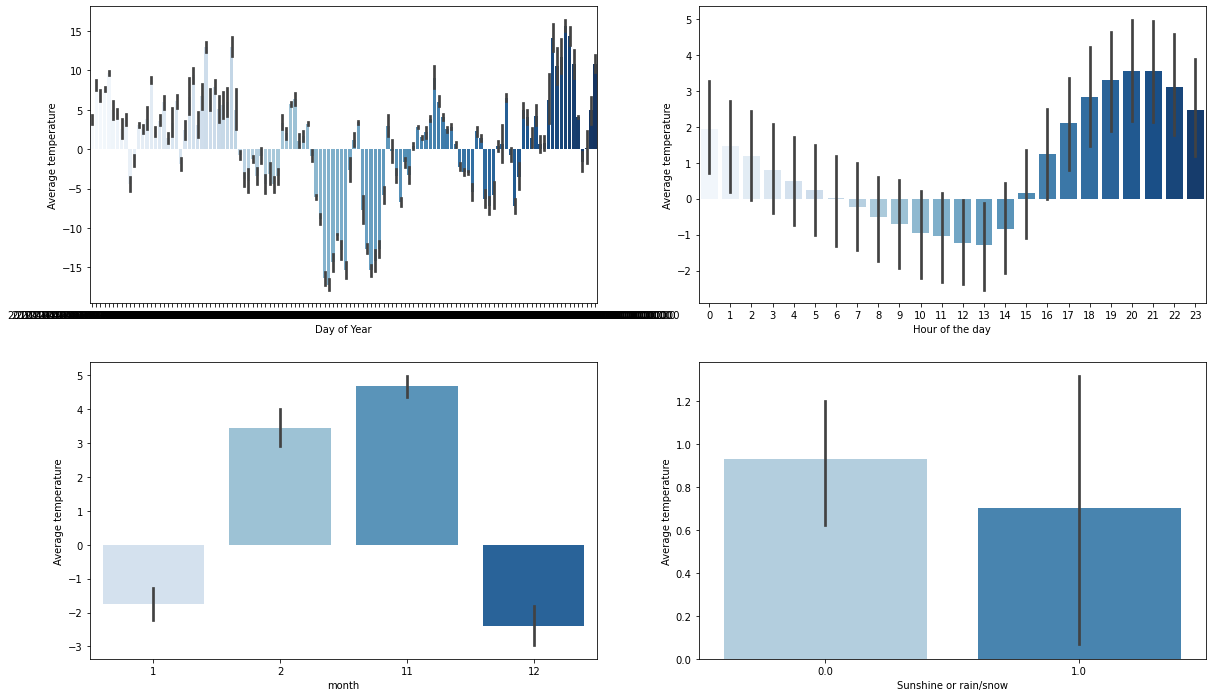

In [84]:
f, axes=plt.subplots(2,2, figsize=(20,12))

#color palettes: 'crest', 'Blues', 'YlOrBr'

days_plot=sns.barplot(x='date',y='avg_temp',data=winter,ax=axes[0][0],palette='Blues')
days_plot.set(xlabel='Day of Year', ylabel='Average temperature')

time_plot=sns.barplot(x='hour',y='avg_temp',data=winter,ax=axes[0][1],palette='Blues')
time_plot.set(xlabel='Hour of the day', ylabel='Average temperature')

month_plot=sns.barplot(x='month',y='avg_temp',data=winter,ax=axes[1][0],palette='Blues')
month_plot.set(xlabel='month', ylabel='Average temperature')

rain_plot=sns.barplot(x='precip',y='avg_temp',data=winter,ax=axes[1][1],palette='Blues')
rain_plot.set(xlabel='Sunshine or rain/snow', ylabel='Average temperature')

plt.show()

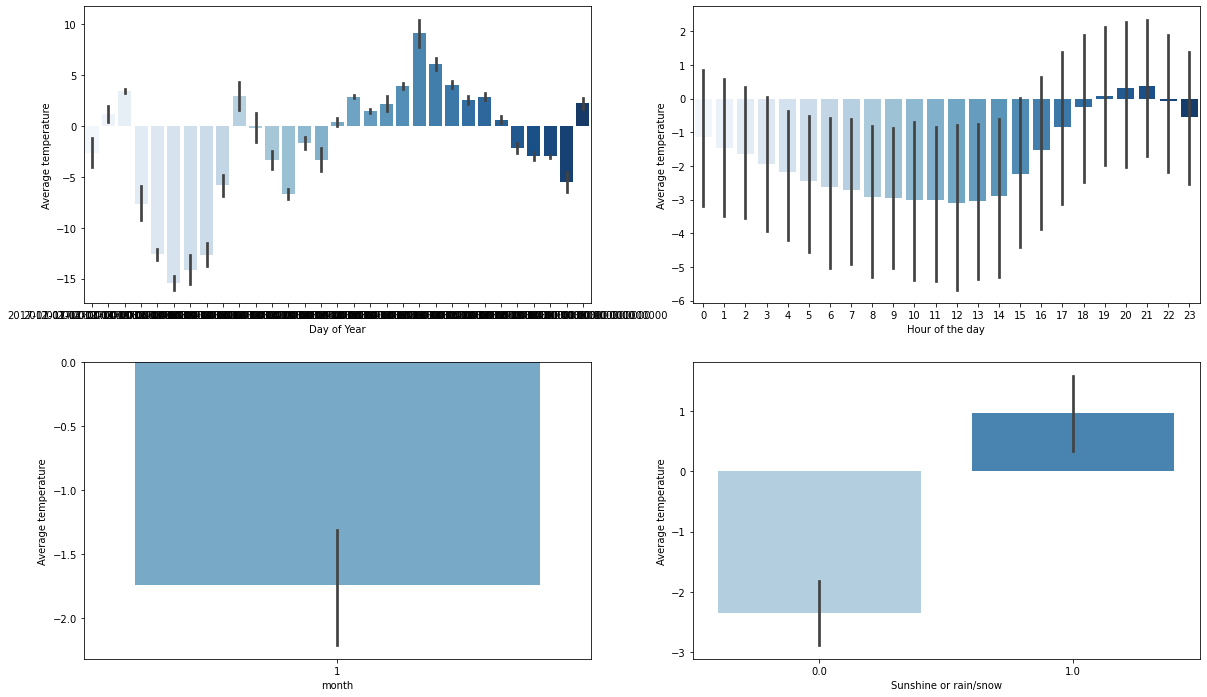

In [85]:
f, axes=plt.subplots(2,2, figsize=(20,12))

#color palettes: 'crest', 'Blues', 'YlOrBr'

days_plot=sns.barplot(x='date',y='avg_temp',data=winter[winter['month']==1],ax=axes[0][0],palette='Blues')
days_plot.set(xlabel='Day of Year', ylabel='Average temperature')

time_plot=sns.barplot(x='hour',y='avg_temp',data=winter[winter['month']==1],ax=axes[0][1],palette='Blues')
time_plot.set(xlabel='Hour of the day', ylabel='Average temperature')

month_plot=sns.barplot(x='month',y='avg_temp',data=winter[winter['month']==1],ax=axes[1][0],palette='Blues')
month_plot.set(xlabel='month', ylabel='Average temperature')

rain_plot=sns.barplot(x='precip',y='avg_temp',data=winter[winter['month']==1],ax=axes[1][1],palette='Blues')
rain_plot.set(xlabel='Sunshine or rain/snow', ylabel='Average temperature')

plt.show()

In [90]:
final_df=final_df.drop(['date'],axis=1)

In [91]:
final_df

,date_time,avg_temp,precip,hour,day,month
0,2017-01-01 00:00:00,-0.6,0.0,0,1,1
1,2017-01-01 01:00:00,-2.2,0.0,1,1,1
2,2017-01-01 02:00:00,-2.8,0.0,2,1,1
3,2017-01-01 03:00:00,-3.3,0.0,3,1,1
4,2017-01-01 04:00:00,-3.3,0.0,4,1,1
...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,-11.1,0.0,19,31,12
8756,2017-12-31 20:00:00,-10.6,0.0,20,31,12
8757,2017-12-31 21:00:00,-10.6,0.0,21,31,12
8758,2017-12-31 22:00:00,-11.7,0.0,22,31,12
